In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics 
import statsmodels.formula.api as smf
import math
import statsmodels.api as sm

In [2]:
# load training data 
df = pd.read_csv(r'/Users/Anna/Dropbox (Penn)/Fall 2022/CIS 5200/Final Project/data/train.csv')
# df = pd.read_csv(r'C:\Users\gaoran\Dropbox (Penn)\Fall 2022\CIS 5200\Final Project\data\train.csv')

In [3]:
print(df)

         srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
9917525   665574  2013-05-21 11:06:37       24                          216   
9917526   665574  2013-05-21 11:06:37       24                          216   
9917527   665574  2013-05-21 11:06:37       24                          216   
9917528   665574  2013-05-21 11:06:37       24                          216   
9917529   665574  2013-05-21 11:06:37       24                          216   

         visitor_hist_starrating  visitor_hist_adr_

In [5]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [15]:
# select relevant variables 
visitor_hist_starrating
visitor_hist_adr_usd
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_log_historical_price
position
price_usd
promotion_flag
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
orig_destination_distance

218

In [13]:
# Check what variables needed to change to dummies 
print("unique country ID: ", len(df['visitor_location_country_id'].unique()))
print("unique ID of the country the hotel is located in: ", len(df['prop_country_id'].unique()))
print("unique ID of the hotel: ", len(df['prop_id'].unique()))
print("unique star rating of the hotel: ", len(df['prop_starrating'].unique()))
print("unique mean customer review score: ", len(df['prop_review_score'].unique()))

# Categorical variables have too many levels, better not to include many dummies?

unique country ID:  218
unique ID of the country the hotel is located in:  172
unique ID of the hotel:  136886
unique star rating of the hotel:  6
unique mean customer review score:  11


In [29]:
# NaN means there is no purchase history on this customer 
print("total number of observations: ", len(df))
print("historical star rating obs: ", df['visitor_hist_starrating'].isna().sum())
print("historical spending obs: ", df['visitor_hist_adr_usd'].isna().sum())
print("star rating of the hotel obs: ", df['prop_starrating'].isna().sum())
print("mean customer review score obs: ", df['prop_review_score'].isna().sum())
print("major hotel chain dummy obs: ", df['prop_brand_bool'].isna().sum())
print("desirability hotel location score 1: ", df['prop_location_score1'].isna().sum())
print("desirability hotel location score 2: ", df['prop_location_score2'].isna().sum())
print("log mean hotel price: ", df['prop_log_historical_price'].isna().sum())
print("position of hotel listing: ", df['position'].isna().sum())
print("displayed price of the hotel for the given search: ", df['price_usd'].isna().sum())
print("disaplyed sale price promotion: ", df['promotion_flag'].isna().sum())
print("Number of nights stay that was searched: ", df['srch_length_of_stay'].isna().sum())
print("Number of future stay days: ", df['srch_booking_window'].isna().sum())
print("Number of adult: ", df['srch_adults_count'].isna().sum())
print("Number of children: ", df['srch_children_count'].isna().sum())
print("Number of rooms: ", df['srch_room_count'].isna().sum())
print("Number of Saturday nights: ", df['srch_saturday_night_bool'].isna().sum())
print("log probability the hotel will be clicked: ", df['srch_query_affinity_score'].isna().sum())
print("physical distance between the hotel and the customer: ", df['orig_destination_distance'].isna().sum())
print("dummy if Expedia has a lower price than competitor 1 : ", df['comp1_rate'].isna().sum())
print("dummy if competitor 1 does not have availability  : ", df['comp1_inv'].isna().sum())
print("percentage difference between Expedia and competitor 1's price : ", df['comp1_rate_percent_diff'].isna().sum())

total number of observations:  9917530
historical star rating obs:  9412233
historical spending obs:  9409918
star rating of the hotel obs:  0
mean customer review score obs:  14630
major hotel chain dummy obs:  0
desirability hotel location score 1:  0
desirability hotel location score 2:  2178380
log mean hotel price:  0
position of hotel listing:  0
displayed price of the hotel for the given search:  0
disaplyed sale price promotion:  0
Number of nights stay that was searched:  0
Number of future stay days:  0
Number of adult:  0
Number of children:  0
Number of rooms:  0
Number of Saturday nights:  0
log probability the hotel will be clicked:  9281966
physical distance between the hotel and the customer:  3216461
dummy if Expedia has a lower price than competitor 1 :  9681724
dummy if competitor 1 does not have availability  :  9663097
percentage difference between Expedia and competitor 1's price :  9732623


In [30]:
# missing data imputation using the average value of the columns
df["visitor_hist_starrating"] = df["visitor_hist_starrating"].fillna(df["visitor_hist_starrating"].mean())
df["visitor_hist_adr_usd"] = df["visitor_hist_adr_usd"].fillna(df["visitor_hist_adr_usd"].mean())
df["prop_review_score"] = df["prop_review_score"].fillna(df["prop_review_score"].mean())
df["orig_destination_distance"] = df["orig_destination_distance"].fillna(df["orig_destination_distance"].mean())
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,3.374634,176.588512,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,3.374634,176.588512,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,3.374634,176.588512,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,3.374634,176.588512,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,3.374634,176.588512,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,665574,2013-05-21 11:06:37,24,216,3.374634,176.588512,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917526,665574,2013-05-21 11:06:37,24,216,3.374634,176.588512,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,154.34,1
9917527,665574,2013-05-21 11:06:37,24,216,3.374634,176.588512,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917528,665574,2013-05-21 11:06:37,24,216,3.374634,176.588512,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [47]:
# create new dataframe based on selected features and data imputations
df_new = df[['click_bool', 'booking_bool', 'random_bool', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 
             'prop_starrating', 'prop_review_score', 
             'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'position', 'price_usd', 
             'promotion_flag', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 
             'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance']]
print(df_new)
df_new.to_csv('/Users/Anna/Dropbox (Penn)/Fall 2022/CIS 5200/Final Project/data/train_new.csv')  

         click_bool  booking_bool  random_bool  visitor_hist_starrating  \
0                 0             0            1                 3.374634   
1                 0             0            1                 3.374634   
2                 0             0            1                 3.374634   
3                 0             0            1                 3.374634   
4                 0             0            1                 3.374634   
...             ...           ...          ...                      ...   
9917525           0             0            0                 3.374634   
9917526           1             1            0                 3.374634   
9917527           0             0            0                 3.374634   
9917528           0             0            0                 3.374634   
9917529           0             0            0                 3.374634   

         visitor_hist_adr_usd  prop_starrating  prop_review_score  \
0                  176.588512 

In [33]:
df['click_bool'].describe()

count    9.917530e+06
mean     4.473614e-02
std      2.067240e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: click_bool, dtype: float64

In [34]:
df['booking_bool'].describe()

count    9.917530e+06
mean     2.788930e-02
std      1.646557e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: booking_bool, dtype: float64

In [35]:
df['visitor_hist_starrating'].describe()

count    9.917530e+06
mean     3.374634e+00
std      1.562479e-01
min      1.000000e+00
25%      3.374634e+00
50%      3.374634e+00
75%      3.374634e+00
max      5.000000e+00
Name: visitor_hist_starrating, dtype: float64

In [39]:
# clicking ATE without controls 
# random_bool = 0 normal sorting, = 1 random sorting
smf.ols('click_bool ~ random_bool', data=df_new).fit().summary().tables[1]

# when the sorting is random, consumers are more likely to click because consumers have higher search cost 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0440,7.83e-05,561.683,0.000,0.044,0.044
random_bool,0.0026,0.000,18.323,0.000,0.002,0.003


In [40]:
# booking ATE without controls 
smf.ols('booking_bool ~ random_bool', data=df_new).fit().summary().tables[1]

# when the sorting is personalized, users are more likley to book the hotel 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0374,6.21e-05,601.863,0.000,0.037,0.037
random_bool,-0.0320,0.000,-280.410,0.000,-0.032,-0.032


In [41]:
# clicking ATE with control variables 
smf.ols('click_bool ~ random_bool + visitor_hist_starrating + visitor_hist_adr_usd + prop_starrating + \
prop_review_score + prop_brand_bool + prop_location_score1+ prop_log_historical_price+ position + price_usd + \
promotion_flag+srch_length_of_stay+srch_booking_window+srch_adults_count+srch_children_count + srch_room_count + \
srch_saturday_night_bool + orig_destination_distance', data=df_new).fit().summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0842,0.001,57.293,0.000,0.081,0.087
random_bool,0.0022,0.000,15.256,0.000,0.002,0.003
visitor_hist_starrating,-0.0007,0.000,-1.497,0.134,-0.002,0.000
visitor_hist_adr_usd,3.782e-07,3.03e-06,0.125,0.901,-5.56e-06,6.31e-06
prop_starrating,0.0014,6.92e-05,20.778,0.000,0.001,0.002
prop_review_score,0.0021,6.68e-05,31.481,0.000,0.002,0.002
prop_brand_bool,0.0020,0.000,14.142,0.000,0.002,0.002
prop_location_score1,-0.0004,4.6e-05,-8.173,0.000,-0.000,-0.000
prop_log_historical_price,-0.0001,3.6e-05,-3.399,0.001,-0.000,-5.19e-05
position,-0.0032,6.28e-06,-510.074,0.000,-0.003,-0.003


In [42]:
# booking ATE with control variables 
smf.ols('booking_bool ~ random_bool + visitor_hist_starrating + visitor_hist_adr_usd + prop_starrating + \
prop_review_score + prop_brand_bool + prop_location_score1+ prop_log_historical_price+ position + price_usd + \
promotion_flag+srch_length_of_stay+srch_booking_window+srch_adults_count+srch_children_count + srch_room_count + \
srch_saturday_night_bool + orig_destination_distance', data=df_new).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0714,0.001,61.066,0.000,0.069,0.074
random_bool,-0.0313,0.000,-270.649,0.000,-0.032,-0.031
visitor_hist_starrating,-0.0006,0.000,-1.523,0.128,-0.001,0.000
visitor_hist_adr_usd,2.909e-06,2.41e-06,1.208,0.227,-1.81e-06,7.63e-06
prop_starrating,6.998e-05,5.5e-05,1.271,0.204,-3.79e-05,0.000
prop_review_score,0.0017,5.31e-05,32.867,0.000,0.002,0.002
prop_brand_bool,0.0026,0.000,23.103,0.000,0.002,0.003
prop_location_score1,-0.0005,3.66e-05,-12.700,0.000,-0.001,-0.000
prop_log_historical_price,-0.0002,2.87e-05,-7.512,0.000,-0.000,-0.000
position,-0.0023,5e-06,-464.755,0.000,-0.002,-0.002


In [44]:
# create data when sorting is random 
df_random = df_new[df_new['random_bool'] == 1]
df_random

,click_bool,booking_bool,random_bool,visitor_hist_starrating,visitor_hist_adr_usd,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,price_usd,promotion_flag,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance
0,0,0,1,3.374634,176.588512,3,3.5,1,2.83,4.95,27,104.77,0,1,0,4,0,1,1,1307.017977
1,0,0,1,3.374634,176.588512,4,4.0,1,2.20,5.03,26,170.74,0,1,0,4,0,1,1,1307.017977
2,0,0,1,3.374634,176.588512,3,4.5,1,2.20,4.92,21,179.80,0,1,0,4,0,1,1,1307.017977
3,0,0,1,3.374634,176.588512,2,4.0,1,2.83,4.39,34,602.77,0,1,0,4,0,1,1,1307.017977
4,0,0,1,3.374634,176.588512,4,3.5,1,2.64,4.93,4,143.58,0,1,0,4,0,1,1,1307.017977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917518,0,0,1,3.374634,176.588512,4,4.5,1,2.94,5.91,15,259.00,1,1,3,2,2,1,0,2563.840000
9917519,0,0,1,3.374634,176.588512,4,4.5,1,3.09,6.21,8,349.00,0,1,3,2,2,1,0,2558.310000
9917520,0,0,1,3.374634,176.588512,5,4.5,1,2.56,6.21,16,429.00,0,1,3,2,2,1,0,2560.300000
9917521,0,0,1,3.374634,176.588512,3,4.0,1,3.33,5.63,6,175.00,1,1,3,2,2,1,0,2557.770000


In [45]:
# clicking ATE without controls 
smf.ols('click_bool ~ position', data=df_random).fit().summary().tables[1]

# higher the position, more likely to click 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0878,0.000,380.452,0.000,0.087,0.088
position,-0.0025,1.18e-05,-210.363,0.000,-0.003,-0.002


In [46]:
# booking ATE without controls 
smf.ols('booking_bool ~ position', data=df_random).fit().summary().tables[1]

# higher the position, more likely to book

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0112,8.07e-05,139.171,0.000,0.011,0.011
position,-0.0004,4.12e-06,-85.242,0.000,-0.000,-0.000


In [21]:
# treatment effect by user's historical ratings
df_5 = df[df['visitor_hist_starrating'] == 5]
df_4 = df[df['visitor_hist_starrating'] == 4]
df_3 = df[df['visitor_hist_starrating'] == 3]
df_2 = df[df['visitor_hist_starrating'] == 2]
df_1 = df[df['visitor_hist_starrating'] == 1]

In [26]:
print(len(df_5))
print(len(df_4))
print(len(df_3))
print(len(df_2))
print(len(df_1))

9117
47756
42316
18166
119


Text(0.5, 0, "Vistor's Historical Ratings")

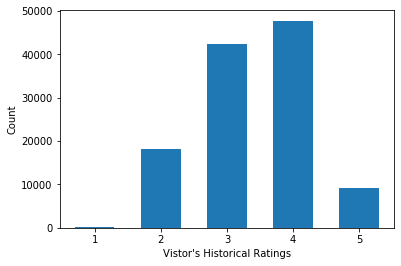

In [35]:
# plot histograph for historical ratings 
y = [119, 18166, 42316, 47756, 9117]
x = ["1", "2", "3", "4", "5"]
plt.bar(x, y, width = 0.6)
plt.ylabel("Count")
plt.xlabel("Vistor's Historical Ratings")

In [40]:
print("average treatment effect for 5 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_5).fit().summary().tables[1])
print("average treatment effect for 4 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_4).fit().summary().tables[1])
print("average treatment effect for 3 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_3).fit().summary().tables[1])
print("average treatment effect for 2 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_2).fit().summary().tables[1])
print("average treatment effect for 1 starting rating users:")
print(smf.ols('click_bool ~ random_bool', data=df_1).fit().summary().tables[1])

# 2 observations:
# first, when calcuate the ATE by groups, results become no longer statistically significant
# second, the treatment has the largest effect for high star rating users; for low star rating users, the treatment effect is even negative

average treatment effect for 5 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0452      0.002     19.022      0.000       0.040       0.050
random_bool     0.0072      0.006      1.144      0.253      -0.005       0.020
average treatment effect for 4 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0439      0.001     42.678      0.000       0.042       0.046
random_bool     0.0009      0.003      0.345      0.730      -0.004       0.006
average treatment effect for 3 starting rating users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0449      0.001     

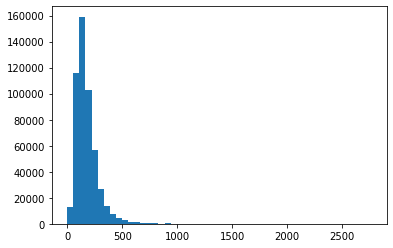

In [44]:
plt.hist(df['visitor_hist_adr_usd'], bins=50)
plt.show()

In [45]:
df['visitor_hist_adr_usd'].describe()

count    507612.000000
mean        176.588512
std         108.434842
min           0.000000
25%         110.330000
50%         151.830000
75%         214.350000
max        2768.930000
Name: visitor_hist_adr_usd, dtype: float64

In [46]:
# treatment effect by user's historical spendings
df_low = df[df['visitor_hist_adr_usd'] <= 100]
df_lowm = df[(df['visitor_hist_adr_usd'] > 100) & (df['visitor_hist_adr_usd'] <= 200)]
df_medium = df[(df['visitor_hist_adr_usd'] > 200) & (df['visitor_hist_adr_usd'] <= 300)]
df_mhigh = df[(df['visitor_hist_adr_usd'] > 300) & (df['visitor_hist_adr_usd'] <= 400)]
df_high = df[df['visitor_hist_adr_usd'] >= 400]

In [48]:
print("average treatment effect for high spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_high).fit().summary().tables[1])
print("average treatment effect for medium-high spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_mhigh).fit().summary().tables[1])
print("average treatment effect for medium spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_medium).fit().summary().tables[1])
print("average treatment effect for medium-low spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_lowm).fit().summary().tables[1])
print("average treatment effect for low spending users:")
print(smf.ols('click_bool ~ random_bool', data=df_low).fit().summary().tables[1])

average treatment effect for high spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0455      0.002     26.624      0.000       0.042       0.049
random_bool     0.0129      0.005      2.776      0.006       0.004       0.022
average treatment effect for medium-high spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0442      0.001     34.201      0.000       0.042       0.047
random_bool     0.0063      0.003      1.856      0.063      -0.000       0.013
average treatment effect for medium spending users:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0435      0.001     61.

In [49]:
df['prop_country_id'].unique()

array([219, 100, 158,  31, 216,  15,  98,  55,  30, 137, 215, 117,  56,
       129,  99,  53, 181, 221,  35,  59, 202, 132, 127, 109, 195, 131,
        70, 220,  13,  92,  91, 113, 205,  14,  41, 154, 164,   9, 138,
       194, 103,  81,  50,   4, 102, 106,  60,  73,  26,  16, 225,  39,
        23, 230, 178,  32, 212, 125, 157, 145, 203, 185,  88, 151,  71,
        10,  80,  68,  33,  77, 134, 152,  61, 153, 159,  18, 182,  63,
        48, 119, 206, 156, 173, 223,  97, 123,   2, 211, 184,  86, 213,
        40,  83, 187,  37, 189, 197,  21,  20,  17,  45,  42,  74, 229,
        47, 224, 112, 200, 149,  27, 122, 162,  93,  69,  34, 190,  96,
       161,  11,  76,  90, 186,  38, 155, 141, 196, 163, 226, 124, 172,
        51, 214, 177, 201,  22, 167, 169, 171,  65, 179, 143, 146,  72,
       136, 128,  82, 120, 111,  19, 160,  25, 217, 192,  57, 208, 222,
        44, 165, 180,  89, 204, 140,   1,  87,  62, 207,  46,   7,  79,
       108, 135, 126])